In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA

In [2]:
lyrics = pd.read_csv('lyrics.csv')
lyrics1 = lyrics.query('genre != "Not Available"')
lyrics1 = lyrics1.dropna()

lyrics2 = lyrics1[lyrics1["genre"] == "Rock"].sample(n=22000)
lyrics3 = lyrics1[lyrics1["genre"] == "Pop"].sample(n=22000)
lyrics4 = lyrics1[lyrics1["genre"] == "Hip-Hop"].sample(n=22000)
#lyrics5 = lyrics1[lyrics1["genre"] == "Metal"].sample(n=2000)
lyrics0 = pd.concat([lyrics2, lyrics3, lyrics4])

In [30]:
from sklearn.decomposition import TruncatedSVD

x_vec = CountVectorizer().fit_transform(lyrics0["lyrics"])

songs = TfidfTransformer().fit_transform(x_vec)

Y = TruncatedSVD(n_components=2).fit_transform(songs)

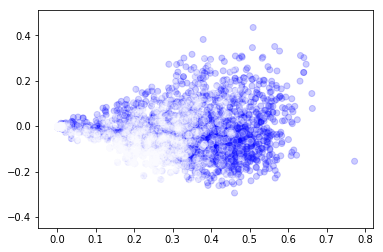

In [32]:
U = lyrics0["genre"].map({"Pop":"white", "Rock":"white", "Hip-Hop":"blue", "Metal":"white" })

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

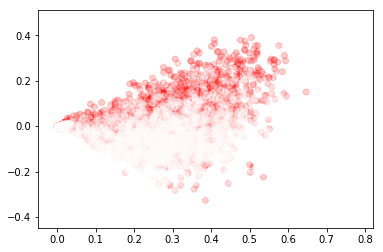

In [34]:
U = lyrics0["genre"].map({"Pop":"red", "Rock": "white", "Hip-Hop":"white", "Metal":"white"})

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

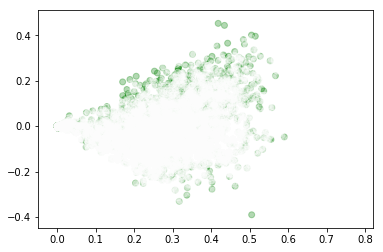

In [36]:
U = lyrics0["genre"].map({"Pop":"white", "Rock":"green", "Hip-Hop":"white", "Metal":"white" })

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.3)

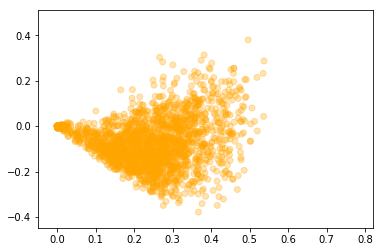

In [37]:
U = lyrics0["genre"].map({"Pop":"white", "Rock":"white", "Hip-Hop":"white", "Metal":"orange" })

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.3)

## Ideas:

### 1) Classify just rock and pop and plot artists / albums in 2 dimensions using predicted probabilities as axes in unit square

### 2) Classify rock/pop/hiphop and plot artists/albums in 3 dimensions

In [27]:
lyrics0[lyrics0["artist"]=="big-star"]

,index,song,year,artist,genre,lyrics
184949,184949,way-out-west,2009,big-star,Rock,She's a schemer and she makes me mad\nBut I lo...
184922,184922,what-s-going-ahn,2009,big-star,Rock,"I liked her face and oh, those eyes\nShe left ..."
184929,184929,try-again,2009,big-star,Rock,Lord I've been trying to be what I should\nLor...
184981,184981,better-save-yourself,2006,big-star,Rock,I'm off the street\nI'm all alone\nI just can'...
184971,184971,holocaust,1992,big-star,Rock,Your eyes are almost dead\nCan't get out of be...
184932,184932,give-me-another-chance,2009,big-star,Rock,"You feel sad 'cause I got mad\nAnd I'm sorry, ..."
184964,184964,for-you,1992,big-star,Rock,Sometimes I can't help but worship you\nI love...
184978,184978,get-away,2006,big-star,Rock,"I know what it is you're thinking\nBut baby, i..."
184991,184991,femme-fatale-fry-rough-mix,2016,big-star,Rock,"Here she comes, you better watch your step\nSh..."
184984,184984,nature-boy-fry-rough-mix,2016,big-star,Rock,There was a boy\nA very strange enchanted boy\...


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss="log", n_iter = 2)),
])

text_clf.fit(lyrics0['lyrics'], lyrics0['genre'])

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [28]:
predicted1 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="beyonce-knowles"]["lyrics"])

predicted2 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="beach-boys"]["lyrics"])

predicted3 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="beatles"]["lyrics"])

predicted4 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="crass"]["lyrics"])

predicted5 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="bruce-springsteen"]["lyrics"])

predicted6 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="aerosmith"]["lyrics"])

predicted7 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="funk-volume"]["lyrics"])

predicted8 = text_clf.predict_proba(lyrics0[lyrics0["artist"]=="big-star"]["lyrics"])


In [10]:
def avg_prob(x):
    a = sum(x)/len(x)  
    return a

In [13]:
avg_prob(predicted1)

array([0.66798268, 0.33201732])

In [36]:
avg_prob(predicted2)

array([0.42723492, 0.57276508])

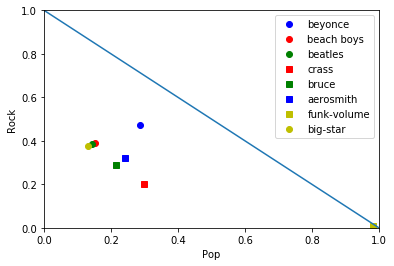

In [32]:
plt.plot(avg_prob(predicted1)[0], avg_prob(predicted1)[1], 'bo', label="beyonce")
plt.plot(avg_prob(predicted2)[0], avg_prob(predicted2)[1], 'ro', label="beach boys")
plt.plot(avg_prob(predicted3)[0], avg_prob(predicted3)[1], 'go', label="beatles")
plt.plot(avg_prob(predicted4)[0], avg_prob(predicted4)[1],  'rs', label="crass")
plt.plot(avg_prob(predicted5)[0], avg_prob(predicted5)[1],  'gs', label="bruce")
plt.plot(avg_prob(predicted6)[0], avg_prob(predicted6)[1],  'bs', label="aerosmith")
plt.plot(avg_prob(predicted7)[0], avg_prob(predicted7)[1],  'ys', label="funk-volume")
plt.plot(avg_prob(predicted8)[0], avg_prob(predicted8)[1],  'yo', label="big-star")
plt.axis((0, 1, 0, 1))
plt.plot(np.linspace(0,1,10),1-np.linspace(0,1,10))

plt.xlabel('Pop')
plt.ylabel('Rock')
plt.legend()

### Interesting that in the above model the beatles fall precisely in the middle, also the linearity of the five choices. Perhaps it would be interesting to look at who maximizes pop probability and who maximizes rock.

In [101]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

ValueError: shape mismatch: objects cannot be broadcast to a single shape

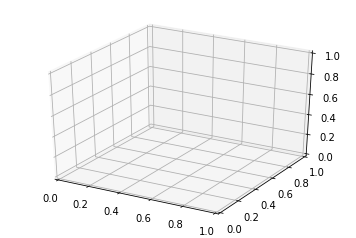

In [108]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[avg, predicted2[0][0]]
y =[predicted1[1],predicted2[1]]
z =[1,1]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [17]:
counter = 0
top_artist=""

for band in lyrics0["artist"].unique():
    predicted0 = text_clf.predict_proba(lyrics0[lyrics0["artist"]==band]["lyrics"])
    if avg_prob(predicted0)[0] > counter:
        counter = avg_prob(predicted0)[0]
        top_artist=band

In [18]:
top_artist

'funk-volume'

In [19]:
counter

0.9837819641598002

In [23]:
counter = 0
top_artist=""

for band in lyrics0["artist"].unique():
    predicted0 = text_clf.predict_proba(lyrics0[lyrics0["artist"]==band]["lyrics"])
    if avg_prob(predicted0)[1] > counter:
        counter = avg_prob(predicted0)[1]
        top_artist=band

In [24]:
top_artist

'fall-from-grace'

In [25]:
counter

0.8161761001517585

### The above two loops show that the most "pop" band is bad city rollers and the most "rock" band is fall from grace, perhaps unsurprisingly both artists I have never heard of

### Use chisquare to decrease features and normalize data and then feed to sgd classifier, use an unsupervised learning method to characterize lyrics

In [33]:
from sklearn.feature_selection import chi2

In [65]:
countvec = CountVectorizer().fit_transform(lyrics0["lyrics"])
tfidf  = TfidfTransformer().fit_transform(countvec)

#c2 = chi2(tfidf, lyrics0["genre"])

In [53]:
np.mean(tfidf)

3.4656796530345325e-05

In [58]:
from sklearn.preprocessing import normalize
normed_matrix = normalize(tfidf, axis=1, norm='l1')

In [66]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
text_uns = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('kme', KMeans(n_clusters=2)),
])

text_uns.fit(lyrics0["lyrics"], lyrics0["genre"])

KeyboardInterrupt: 